# Resume Filtering Approches

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import metrics
from collections import defaultdict, Counter
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Resume Filtering probabilistic model

## Some Important points
Approach:

1. **Data preprocessing**: We will address the drawbacks and missing values in the dataset. Since the data lacks a target label, this problem falls under **unsupervised learning**. In a **Colab cell**, we can apply techniques such as **clustering** and **topic modeling** to handle missing values and explore the structure within the data.

2. **Labeling the data**: By using unsupervised techniques like clustering, we can group similar data points together. This clustering process will help us assign labels to the data using **probabilistic clustering** and setting appropriate thresholds.

3. **Supervised classification**: Now that we have labeled data, we can train a **supervised model** for classification, which is suitable for the traditional resume filtering task. In a **Colab cell**, we can use the labeled data to train the model and identify the best intern candidates.

4. **Feature selection and pattern identification**: Instead of using all available features, we can apply **dimensionality reduction techniques** such as Principal Component Analysis (PCA) to select the most relevant features. This step helps eliminate noise and identify the key factors influencing classification. By creating clusters based on these features, we can identify **patterns** and differentiate candidates based on their properties.



In [214]:
from google.colab import files
# Use the files.upload() function to upload a data file
uploaded_file = files.upload()


In [215]:
data_path='/content/Applications_for_Machine_Learning_internship_edited.xlsx - Sheet1.csv'
data=pd.read_csv(data_path)


In [216]:
df=data.copy()
df.head()

,Name,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,NaN,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,NaN,6.50/7,NaN,NaN
1,NaN,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,8.90/10,NaN,NaN
2,NaN,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,NaN,NaN,NaN,NaN
3,NaN,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...","Yes, I am available for 3 months starting imme...",Bachelor of Engineering (B.E),NaN,2024,NaN,NaN,85.60/85.60,10.00/10.00
4,NaN,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,NaN,8.10/10,93.40/93.40,10.00/10.00


## Data Information

### Renaming Columns

In [217]:

df.rename(columns={'Name': 'name',
                   'Python (out of 3)': 'python',
                   'Machine Learning (out of 3)': 'ML',
                   'Natural Language Processing (NLP) (out of 3)': 'NLP',
                   'Deep Learning (out of 3)': 'DL',
                   'Other skills': 'other_skills',
                   'Are you available for 3 months, starting immediately, for a full-time work from home internship? ': 'availability',
                   'Degree': 'degree',
                   'Stream': 'stream',
                   'Current Year Of Graduation': 'graduation_year',
                   'Performance_PG': 'post_grade',
                   'Performance_UG': 'ug_grade',
                   'Performance_12': '12_grade',
                   'Performance_10': '10_grade'}, inplace=True)
df.head()

,name,python,ML,NLP,DL,other_skills,availability,degree,stream,graduation_year,post_grade,ug_grade,12_grade,10_grade
0,NaN,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,NaN,6.50/7,NaN,NaN
1,NaN,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,8.90/10,NaN,NaN
2,NaN,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,NaN,NaN,NaN,NaN
3,NaN,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...","Yes, I am available for 3 months starting imme...",Bachelor of Engineering (B.E),NaN,2024,NaN,NaN,85.60/85.60,10.00/10.00
4,NaN,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,NaN,8.10/10,93.40/93.40,10.00/10.00


In [218]:
# to get the information of the data for the better insight
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             0 non-null      float64
 1   python           1136 non-null   int64  
 2   ML               1136 non-null   int64  
 3   NLP              1136 non-null   int64  
 4   DL               1136 non-null   int64  
 5   other_skills     1070 non-null   object 
 6   availability     1136 non-null   object 
 7   degree           1093 non-null   object 
 8   stream           966 non-null    object 
 9   graduation_year  1136 non-null   int64  
 10  post_grade       184 non-null    object 
 11  ug_grade         482 non-null    object 
 12  12_grade         493 non-null    object 
 13  10_grade         427 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 124.4+ KB


In [219]:
# calculating the null values
df.isnull().sum()

name               1136
python                0
ML                    0
NLP                   0
DL                    0
other_skills         66
availability          0
degree               43
stream              170
graduation_year       0
post_grade          952
ug_grade            654
12_grade            643
10_grade            709
dtype: int64

In [220]:
# mean and all values
df.describe()

,name,python,ML,NLP,DL,graduation_year
count,0.0,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000
mean,NaN,1.792254,1.300176,0.497359,0.662852,1994.375000
std,NaN,0.917270,1.016446,0.861303,0.938587,238.489554
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,0.000000,0.000000,0.000000,2023.000000
50%,NaN,2.000000,2.000000,0.000000,0.000000,2023.000000
75%,NaN,2.000000,2.000000,1.000000,1.000000,2024.000000
max,NaN,3.000000,3.000000,3.000000,3.000000,2027.000000


In [221]:
# Assuming your dataset is stored in a DataFrame called 'df'
# lets find the categorical vcolumns
categorical_columns = df.select_dtypes(include=['object']).columns
num_categorical_columns = len(categorical_columns)
print("Number of categorical columns:", num_categorical_columns)

Number of categorical columns: 8


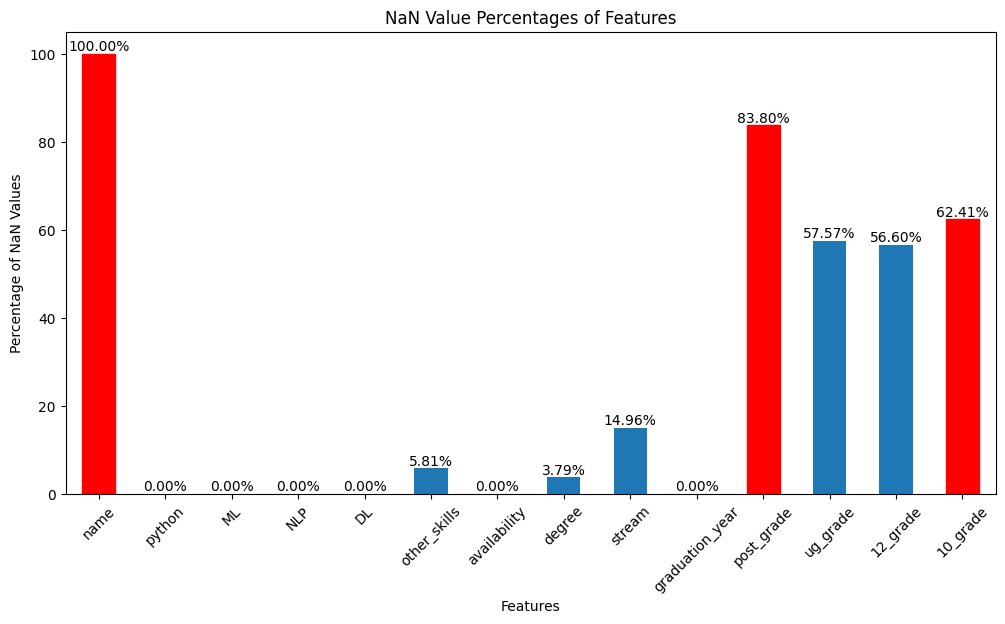

In [222]:
# Assuming your dataset is stored in a DataFrame called 'df'
nan_counts = df.isnull().sum()
nan_percentages = (nan_counts / len(df)) * 100

# Plotting the NaN value percentages
plt.figure(figsize=(12, 6))
ax = nan_percentages.plot(kind='bar')
plt.title('NaN Value Percentages of Features')
plt.xlabel('Features')
plt.ylabel('Percentage of NaN Values')
plt.xticks(rotation=45)

# Coloring bars with more than 60% NaN values in red
threshold = 60  # Set the threshold percentage
for p, percentage in zip(ax.patches, nan_percentages):
    if percentage > threshold:
        p.set_color('red')

# Annotating each bar with the percentage value
for p in ax.patches:
    percentage = f"{p.get_height():.2f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

######################################################################

# Data Detail:

Upon examining the graph, it becomes evident that several columns in the dataset contain more than 60% missing values.

# Dropping columns vs. considering their significance:

While dropping these columns may seem like a feasible option, it is important to consider the potential significance of these columns for our analysis.

# Variable indicator approach for categorical columns with missing values:

Moreover, since the data lacks a target label and the columns with missing values are categorical, employing a variable indicator approach can be beneficial.

# Creating binary columns to indicate missing values:

Rather than imputing the missing values, we can create new binary columns to indicate whether the values were missing in the original columns. This approach allows us to retain valuable information about the missingness while preserving the categorical nature of the columns.

# Effective handling of missing values:

By utilizing this technique, we can effectively handle missing values in the dataset.

######################################################################


In [223]:
def unique_value(data, col):
    """
    Function to extract unique values from a specific column in a DataFrame.

    Args:
        data (DataFrame): The input DataFrame.
        col (str): The column name from which to extract unique values.

    Returns:
        set: A set of unique values from the specified column.
    """

    unique_values = set()

    for row in data[col]:
        if isinstance(row, str):
            values = row.split(', ')
            unique_values.update(values)

    print(f'Unique Values: {len(unique_values)}')
    return unique_values


In [224]:
# Define a custom mapping function
def map_sentence_to_binary(value):
    if 'yes' in value.lower():
        return 1
    elif 'no' in value.lower():
        return 0
    else:
        return None  # or any other default value you prefer

def count_1_0(data,col):
    count_1,count_0=data[col].value_counts()[1],data[col].value_counts()[0]
    print(f'Yes Values :{count_1}, No Values :{count_0}')

df['availability']=df['availability'].apply(map_sentence_to_binary)
count_1_0(df,'availability')

Yes Values :1112, No Values :24


In [225]:
def grade_mapping(data, col, criteria):
    modified_col = data[col].apply(lambda x: 1 if (not pd.isna(x) and float(x.split('/')[0]) > criteria) else 0)
    return modified_col


In [226]:

# Assuming your DataFrame is named 'df' and the grade column is named 'grade'
#here we are changing tha nan value with zero and making an missing value indicator
#variable which can choose have the cr(criteria)which shows if there is a value which
#greater than cr marks as 1 other wise zero
cr=8.0
df['ug_grade_missing'] = grade_mapping(df, 'ug_grade', cr)
df['post_grade_missing'] = grade_mapping(df, 'post_grade', cr)
df['12_grade_missing'] = grade_mapping(df, '12_grade', cr)
df['10_grade_missing']= grade_mapping(df, '10_grade', cr)

In [227]:
df.drop(['ug_grade','post_grade','12_grade','10_grade'],axis=1,inplace=True)


In [228]:
# Criteria list
# here we are making an criteria list for the soft skills though
criteria = ['R Programming', 'MongoDB', 'Flask', 'Data Analytics', 'MySQL', 'NoSQL', 'CI/CD', 'C++ Programming',
            'Data structure', 'Flutter', 'Robotic Process Automation (RPA)', 'OpenCV',
            'Database Management System (DBMS)', 'DBMS', 'Image Processing', 'Hadoop', 'Artificial Intelligence',
            'AI', 'Tableau', 'DSA']

# Create a new column to store the scores
df['skill_score'] = 0

# Iterate over each row
for index, row in df.iterrows():
    skills = row['other_skills']
    score = 0

    if isinstance(skills, str):
        skills = skills.lower()  # Convert skills to lowercase for case insensitivity

        # Check if any criteria skill is present in the skills column
        for skill in criteria:
            if skill.lower() in skills:
                score = 1
                break


    df.at[index, 'skill_score'] = score
df.drop('other_skills',axis=1,inplace=True)
# Print the updated DataFrame
df.head()

,name,python,ML,NLP,DL,availability,degree,stream,graduation_year,ug_grade_missing,post_grade_missing,12_grade_missing,10_grade_missing,skill_score
0,NaN,1,0,0,1,1,Bachelor of Vocation (B.Voc.),Software Engineering,2021,0,0,0,0,1
1,NaN,2,0,0,0,1,B.Tech,Computer Science & Engineering,2024,1,0,0,0,1
2,NaN,2,2,0,0,1,Master of Science (M.S.),Data Science And Analytics,2022,0,0,0,0,1
3,NaN,3,2,2,0,1,Bachelor of Engineering (B.E),NaN,2024,0,0,1,1,1
4,NaN,2,2,0,0,1,B.Tech,Computer Science,2023,1,0,1,1,1


In [229]:
# making an criteria for the graduation keywords and post_graduate keywords to filter the columns value
# for graduation value will be 1 and for the other post graduation value will be 2
graduation_keywords=[
 'B.E Computer Science and Engineering (Artificial Intelligence and machine Learning)',
 'B.Tech',
 'B.Tech (Hons.)',
 'BS in Data Science and Applications',
 'Bachelor Of Science (B.Sc)',
 'Bachelor Of Technology (B.Tech) CS',
 'Bachelor of Computer Applications (BCA)',
 'Bachelor of Computer Applications (BCA) (Hons.)',
 'Bachelor of Computer Engineering',
 'Bachelor of Computer Science (B.C.S.)',
 'Bachelor of Information Technology (B.I.T.)',
 'Bachelor of Science (B.Sc)',
 'Bachelor of Science (B.Sc) (Hons.)',
 'Bachelor of Science (B.Sc) (Pass)',
 'Bachelors of Data Science',
 'Bsc',
 'Btech',
 'Certified Data Scientist',
 'Data Science',
]
masters_keywords=[
 'Integrated B.E & M.Tech',
 'Integrated B.Tech',
 'Integrated M.Sc.',
 'Integrated M.Tech',
 'Integrated MCA',
 'M.Sc. in Data Science',
 'M.Tech',
 'MCA',
 'Master of Computer Applications (MCA)',
 'Master of Computer Science (M.C.S.)',
 'Master of Data Science',
 'Master of Information Technology (M.I.T.)',
 'Master of Science (M.Sc) (Tech)',
 'Master of Technology (M.Tech)',
 'Ms In Data Science',
 'PG Diploma in Data Science',
 'Post Graduate Diploma In Computer Applications (P.G.D.C.A.)',
 'Post Graduate Diploma In Data Analytics And Machine Learning',
 'Post Graduate Diploma in Big Data Analytics (PG-DBDA)'
 ]

# Step 1: Create Degree Level feature
df['Degree Level'] = 0

# Step 2: Preprocessing - Convert to lowercase and remove leading/trailing whitespace
df['degree'] = df['degree'].str.lower().str.strip()


for index, row in df.iterrows():
    degree = row['degree']
    if isinstance(degree,str):
      if any(keyword.lower().replace(' ', '') in degree for keyword in graduation_keywords):
          df.at[index, 'Degree Level'] = 1
      elif any(keyword.lower().replace(' ', '') in degree for keyword in masters_keywords):
          df.at[index, 'Degree Level'] = 2


In [230]:
df.drop(['name','stream','degree','graduation_year'],axis=1,inplace=True)
df

,python,ML,NLP,DL,availability,ug_grade_missing,post_grade_missing,12_grade_missing,10_grade_missing,skill_score,Degree Level
0,1,0,0,1,1,0,0,0,0,1,0
1,2,0,0,0,1,1,0,0,0,1,1
2,2,2,0,0,1,0,0,0,0,1,0
3,3,2,2,0,1,0,0,1,1,1,0
4,2,2,0,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1131,2,2,0,2,1,0,0,0,0,1,1
1132,3,3,2,3,1,0,0,0,0,1,1
1133,3,1,3,3,1,1,0,1,0,1,1
1134,2,1,0,0,1,0,0,1,0,1,1


## Data Visualization

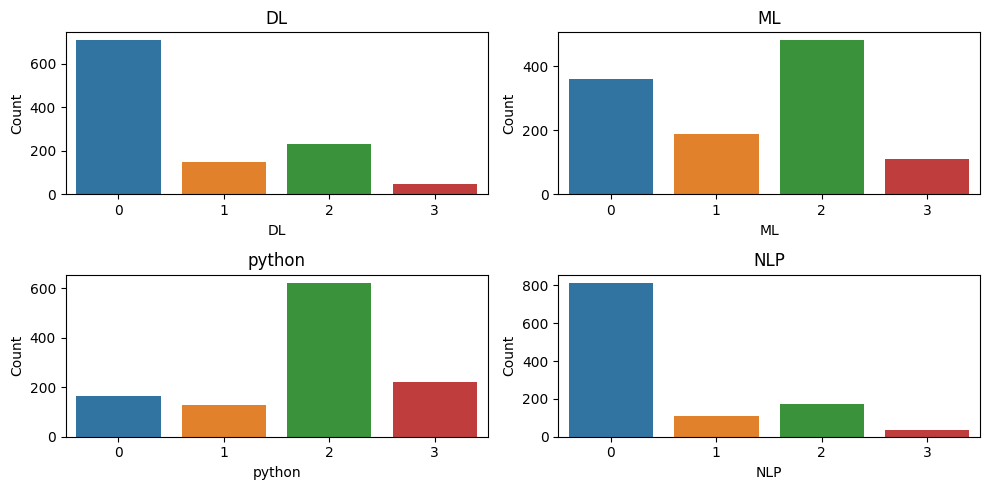

In [231]:

# Define the columns for subplots
columns = ['DL','ML','python','NLP']

# Calculate the number of rows and columns for the subplots
num_plots = len(columns)
num_cols = 2  # Number of subplots per row
num_rows = (num_plots - 1) // num_cols + 1

# Create a new figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

# Flatten the axes array if it has multiple rows
axes = axes.flatten()

# Iterate over the columns and create count plots
for i, column in enumerate(columns):
    ax = axes[i]  # Get the current axis
    sns.countplot(x=column, data=df, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.set_title(column)

# Hide empty subplots if any
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

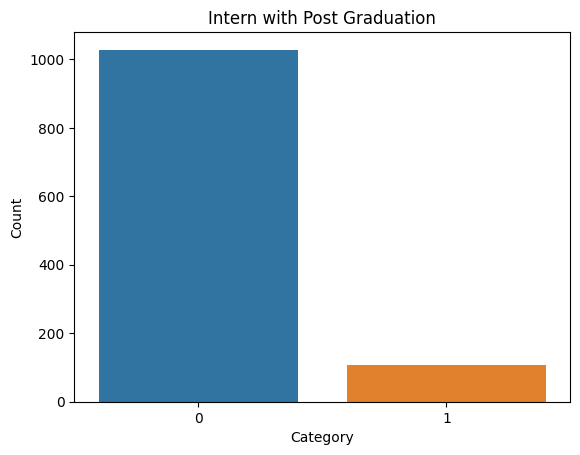

In [232]:
# Example of a bar plot
sns.countplot(x='post_grade_missing', data=df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Intern with Post Graduation')
plt.show()

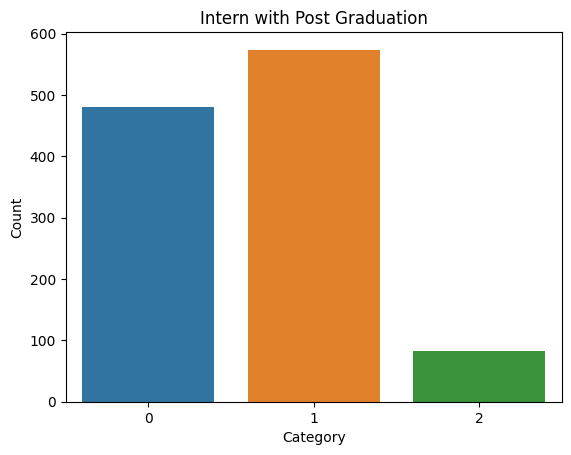

In [233]:
# Example of a bar plot
sns.countplot(x='Degree Level', data=df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Intern with Post Graduation')
plt.show()

## Splitting the data

In [234]:
from sklearn.model_selection import train_test_split
train_df,x_test=train_test_split(df,test_size=0.2,random_state=42)
train_df.shape

(908, 11)

In [235]:
# Split the data into training and test sets
train_df, x_test = train_test_split(df, test_size=0.2, random_state=42)

# Create an instance of the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
train_df_scaled = scaler.fit_transform(train_df)

# Print the shape of the scaled training data
print(train_df_scaled.shape)

(908, 11)


## Feature Selection

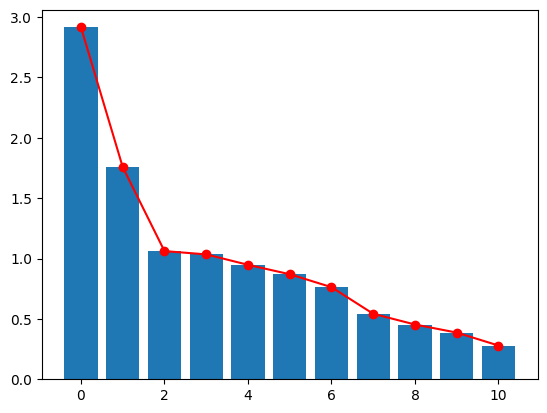

In [236]:
from sklearn.decomposition import PCA
#here we are using the pCA to visualize the variance
pca = PCA()
pca.fit(train_df_scaled)
df_pca_all = pca.transform(train_df_scaled)
eigenvalues = pca.explained_variance_
plt.bar(np.arange(0,train_df.shape[1],1), eigenvalues)
plt.plot(eigenvalues, "r")
plt.plot(eigenvalues, "ro")
plt.show()

## Detection of Outliers using PCA

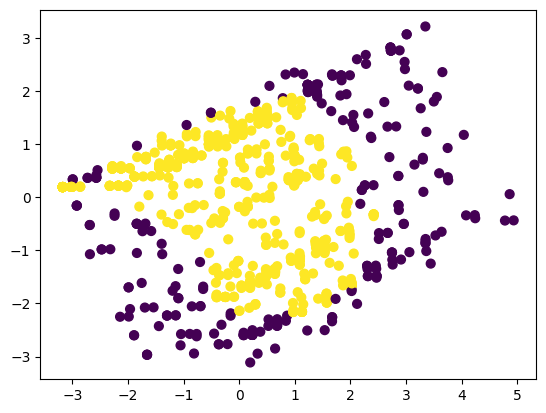

In [237]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
clf = IsolationForest(n_estimators=1000, random_state=rng)
#df_pca is the new projected data
# Assuming your original dataset is stored in a DataFrame called 'df'
# Perform PCA transformation
pca = PCA(n_components=2)  # Specify the desired number of components (in this example, 3)
df_pca_all = pca.fit_transform(train_df_scaled)

df_pca=df_pca_all
clf.fit(df_pca)
IF_labels = clf.predict(df_pca)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=IF_labels, s=40, cmap='viridis')


### Purple are the outliers

### Selecting Best feature Using PCA under the Consideration of Outliers

In [238]:
class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features
    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]
        X = np.array(X)
        sc = StandardScaler()
        # X = sc.fit_transform(X)
        pca = PCA(n_components=self.q).fit(X) # calculation Cov matrix is embeded in PCA
        A_q = pca.components_.T
        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_
        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))
        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]
#Run exhaustive search to find the best features to keep:
def get_key(val,y):
    for key, value in Counter(y).items():
         if val == value:
             return key

    return "key doesn't exist"
feature_scores={}
features_names={}
p = 1
#n will be the number of features you have
n = 10
for k in range(3,n,1):
    scores=[]
    print('########## K = ',k,' #######')
    pfa = PFA(n_features=k)
    pfa.fit(train_df_scaled)
    # To get the transformed matrix
    x = pfa.features_
    selected_indices = pfa.indices_  # Get the indices of the selected features
    selected_columns = train_df.columns[selected_indices]  # Get the column names using
    rng = np.random.RandomState(42)
    clf = IsolationForest(n_estimators=1000, random_state=rng)
    clf.fit(x)
    IF_labels = clf.predict(x)
    m = get_key(max(Counter(IF_labels).values()),IF_labels)
    x = pd.DataFrame(x)
    x['outliers'] = IF_labels
    x = x[x['outliers'] == m ]
    x = x.drop(columns = 'outliers')
    x = np.array(x)
    pca.fit(x)
    x = pca.transform(x)
    model_agg_clustering = AgglomerativeClustering(n_clusters=4)
    # fit model and predict clusters
    yhat_agg_clustering = model_agg_clustering.fit_predict(x)
    print('agglomerative')
    model_birch = Birch(threshold=0.01, n_clusters=4)
    # fit the model
    model_birch.fit(x)
    # assign a cluster to each example
    yhat_birch = model_birch.predict(x)
    model_mb_km = MiniBatchKMeans(n_clusters=4)
    # fit the model
    model_mb_km.fit(x)
    # assign a cluster to each example
    print('Mini Batch Kmeans')
    yhat_mb_km = model_mb_km.predict(x)
    label_list = [yhat_agg_clustering, yhat_birch, yhat_mb_km]
    models = ['AgglomerativeClustering', 'BIRCH', 'MiniBatch_KMeans']
    for idx,labels in enumerate(label_list):
        silhouette_avg = silhouette_score(x, labels)
        print("The average silhouette_score for", models[idx], " is :", silhouette_avg)
        scores.append(silhouette_avg)
    print(f'Iteration : {k} compelete')
    feature_scores[k]=scores
    features_names[k]=selected_columns
    print(selected_columns)

########## K =  3  #######
agglomerative
Mini Batch Kmeans
The average silhouette_score for AgglomerativeClustering  is : 0.22549019607843138
The average silhouette_score for BIRCH  is : 1.0
The average silhouette_score for MiniBatch_KMeans  is : 1.0
Iteration : 3 compelete
Index(['NLP', 'DL', 'ug_grade_missing'], dtype='object')
########## K =  4  #######
agglomerative
Mini Batch Kmeans
The average silhouette_score for AgglomerativeClustering  is : 0.6530141267572958
The average silhouette_score for BIRCH  is : 0.6530141267572958
The average silhouette_score for MiniBatch_KMeans  is : 0.6529980999697078
Iteration : 4 compelete
Index(['DL', 'ML', 'post_grade_missing', 'Degree Level'], dtype='object')
########## K =  5  #######
agglomerative
Mini Batch Kmeans
The average silhouette_score for AgglomerativeClustering  is : 0.7884425180543428
The average silhouette_score for BIRCH  is : 0.6607805089849994
The average silhouette_score for MiniBatch_KMeans  is : 0.8064799331852219
Iteration 

In [239]:
# What is the best
best_score = -1
best_model = ""
best_key = -1

for k, scores in feature_scores.items():
    max_score = max(scores)
    if max_score > best_score:
        best_score = max_score
        best_model = models[scores.index(max_score)]
        best_key = k

#print("Best model:", best_model)
print("Best score:", best_score)
print("Best key (number of features):", best_key)
print('Best features are : ',features_names[best_key])

Best score: 1.0
Best key (number of features): 3
Best features are :  Index(['NLP', 'DL', 'ug_grade_missing'], dtype='object')


In [240]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import metrics
import pickle
# this function is to train the three clustering algorithms ,AGGLOMERATIVE,KMEANS,DBSCAN, with testing als
def train_models(x_train, x_test):
    algorithms = [
        KMeans(n_clusters=4),
        DBSCAN(eps=0.5, min_samples=5),
        AgglomerativeClustering(n_clusters=4)
    ]

    best_model = None
    best_silhouette = -1

    for algo in algorithms:
        if isinstance(algo, DBSCAN):
            clust_labels = algo.fit_predict(x_train)
        else:
            algo.fit(x_train)
            clust_labels = algo.labels_

        # Evaluate the training set clustering
        silhouette = silhouette_score(x_train, clust_labels)
        ch_index = metrics.calinski_harabasz_score(x_train, clust_labels)
        db_index = metrics.davies_bouldin_score(x_train, clust_labels)

        print(f"Algorithm: {algo.__class__.__name__}")
        print(f"Training Set - Silhouette Score: {silhouette}")
        print(f"Training Set - Calinski-Harabasz Index: {ch_index}")
        print(f"Training Set - Davies-Bouldin Index: {db_index}")

        # Evaluate the testing set clustering
        if isinstance(algo, DBSCAN):
            test_clust_labels = algo.fit_predict(x_test)
        elif isinstance(algo, AgglomerativeClustering):
            test_clust_labels = algo.fit_predict(x_test)
        else:
            test_clust_labels = algo.predict(x_test)

        silhouette = silhouette_score(x_test, test_clust_labels)
        ch_index = metrics.calinski_harabasz_score(x_test, test_clust_labels)
        db_index = metrics.davies_bouldin_score(x_test, test_clust_labels)

        print(f"Testing Set - Silhouette Score: {silhouette}")
        print(f"Testing Set - Calinski-Harabasz Index: {ch_index}")
        print(f"Testing Set - Davies-Bouldin Index: {db_index}\n")

        # Update the best model
        if silhouette > best_silhouette:
            best_model = algo
            best_silhouette = silhouette

    print('The Best Algorithms :',best_model)


In [241]:
#transforming xtest
x_test_scaled = scaler.transform(x_test)

In [242]:
# testing the features obtained by the PCA using outliers
x_train_f,x_test_f=train_df_scaled[:,:k],x_test_scaled[:,:k]

In [243]:
train_models(x_train_f,x_test_f)

Algorithm: KMeans
Training Set - Silhouette Score: 0.274371136113233
Training Set - Calinski-Harabasz Index: 225.17397986330658
Training Set - Davies-Bouldin Index: 1.3450294808969436
Testing Set - Silhouette Score: 0.2811313061932461
Testing Set - Calinski-Harabasz Index: 55.00490989687615
Testing Set - Davies-Bouldin Index: 1.2295047525244402

Algorithm: DBSCAN
Training Set - Silhouette Score: 0.26393572306897795
Training Set - Calinski-Harabasz Index: 13.701745554113183
Training Set - Davies-Bouldin Index: 1.2534099517085284
Testing Set - Silhouette Score: 0.0508201193822807
Testing Set - Calinski-Harabasz Index: 7.681453892736486
Testing Set - Davies-Bouldin Index: 1.1687722897325168

Algorithm: AgglomerativeClustering
Training Set - Silhouette Score: 0.22492256870487695
Training Set - Calinski-Harabasz Index: 179.23108493061855
Training Set - Davies-Bouldin Index: 1.5330493292660559
Testing Set - Silhouette Score: 0.28019201824098977
Testing Set - Calinski-Harabasz Index: 53.63488

In [244]:
# Choosing all the Features
train_models(train_df_scaled,x_test_scaled)

Algorithm: KMeans
Training Set - Silhouette Score: 0.2086235926353646
Training Set - Calinski-Harabasz Index: 172.0498854113258
Training Set - Davies-Bouldin Index: 1.539353958116383
Testing Set - Silhouette Score: 0.20353097022938646
Testing Set - Calinski-Harabasz Index: 39.754287056795576
Testing Set - Davies-Bouldin Index: 1.4416527445822882

Algorithm: DBSCAN
Training Set - Silhouette Score: -0.026500737367050886
Training Set - Calinski-Harabasz Index: 9.775991676788937
Training Set - Davies-Bouldin Index: 1.2158497061580473
Testing Set - Silhouette Score: -0.13179592653712385
Testing Set - Calinski-Harabasz Index: 2.5219246827541517
Testing Set - Davies-Bouldin Index: 1.3594861040945527

Algorithm: AgglomerativeClustering
Training Set - Silhouette Score: 0.19356374525986353
Training Set - Calinski-Harabasz Index: 147.57209534083756
Training Set - Davies-Bouldin Index: 1.6042564666773924
Testing Set - Silhouette Score: 0.17188263554109068
Testing Set - Calinski-Harabasz Index: 40.

In [245]:
train_df.columns

Index(['python', 'ML', 'NLP', 'DL', 'availability', 'ug_grade_missing',
       'post_grade_missing', '12_grade_missing', '10_grade_missing',
       'skill_score', 'Degree Level'],
      dtype='object')

## Training Our Best Algorithms So far

In [246]:

data=train_df_scaled
o_data=pd.DataFrame()
# Perform agglomerative clustering
kmeans = KMeans(n_clusters=4)
cluster_labels = kmeans.fit_predict(data)

# Assign cluster labels
o_data['Cluster'] = cluster_labels

# Define cluster names
cluster_names = {
    3: 'Best Fit',
    2: 'Good Fit',
    1: 'Moderate Fit',
    0: 'Reject Fit'
}

# Map cluster labels to cluster names
o_data['Cluster Name'] = o_data['Cluster'].map(cluster_names)

# Print the data with cluster labels and names
print(o_data[['Cluster', 'Cluster Name']])


     Cluster  Cluster Name
0          1  Moderate Fit
1          1  Moderate Fit
2          1  Moderate Fit
3          2      Good Fit
4          3      Best Fit
..       ...           ...
903        0    Reject Fit
904        2      Good Fit
905        2      Good Fit
906        2      Good Fit
907        1  Moderate Fit

[908 rows x 2 columns]


## testing algorithms on test data

In [247]:
def predict_data(model,dat_p,p=False):
  # Predict clusters for the new data
  new_cluster_labels = model.predict(dat_p)
  new_data=pd.DataFrame()
  # Assign cluster labels to the new data
  new_data['Cluster'] = new_cluster_labels

  # Map cluster labels to cluster names
  new_data['Cluster Name'] = new_data['Cluster'].map(cluster_names)

  # Print the new data with predicted cluster labels and names
  if p:
    print(new_data[['Cluster', 'Cluster Name']])
  return new_data['Cluster']


## Now labeling the whole_data

In [248]:
label_data=scaler.transform(df)
label_col=predict_data(kmeans,label_data)
label_col

0       1
1       1
2       1
3       2
4       2
       ..
1131    3
1132    3
1133    3
1134    2
1135    1
Name: Cluster, Length: 1136, dtype: int32

In [249]:
final_labeled_df=pd.concat([df,label_col],axis=1)
final_labeled_df

,python,ML,NLP,DL,availability,ug_grade_missing,post_grade_missing,12_grade_missing,10_grade_missing,skill_score,Degree Level,Cluster
0,1,0,0,1,1,0,0,0,0,1,0,1
1,2,0,0,0,1,1,0,0,0,1,1,1
2,2,2,0,0,1,0,0,0,0,1,0,1
3,3,2,2,0,1,0,0,1,1,1,0,2
4,2,2,0,0,1,1,0,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1131,2,2,0,2,1,0,0,0,0,1,1,3
1132,3,3,2,3,1,0,0,0,0,1,1,3
1133,3,1,3,3,1,1,0,1,0,1,1,3
1134,2,1,0,0,1,0,0,1,0,1,1,2


In [250]:
#lets save importants
# Assuming you have trained and obtained your model, save it as follows:
model=kmeans
with open('cluster_model.pkl', 'wb') as file:
    pickle.dump(model, file)

import json
# Define the filename and path for the JSON file
json_file = 'cluster_names.json'

# Save the cluster_names dictionary as a JSON file
with open(json_file, 'w') as file:
    json.dump(cluster_names, file)
# Assuming you have a scaler object named 'scaler'
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
final_labeled_df.to_csv('labeled_data.csv',index=False)


## Training the supervised Model as now we have a a labeled data

In [251]:
!pip install --upgrade scikit-learn


In [252]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming your DataFrame is named 'df' and the last column is the target variable

# Select features (all columns except the last one)
features = final_labeled_df.iloc[:, :-1]

# Select the target variable (last column)
target = final_labeled_df.iloc[:, -1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a scaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Classifier
model = RandomForestClassifier()

# Train the model on the scaled training set
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9780701754385965
Precision: 0.9779941548623605
Recall: 0.9780701754385965
F1 Score: 0.9779989447302466


In [253]:
#saved the model and scaler
with open('cls_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    # Assuming you have a scaler object named 'scaler'
with open('cls_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

So this classification algorithm can classify the intern resume based on the answer and put them into 4 category <br>
1.Best fit<br>
2.Good fit<br>
3.Moderate git<br>
4.Reject<br>

# Evaluation on those  features whihc have zero NAN values and higher Co-variance(Not Considering the realcase)

In [254]:
col=['python', 'ML', 'NLP', 'DL', 'availability']
best_features=df[col]
best_features


,python,ML,NLP,DL,availability
0,1,0,0,1,1
1,2,0,0,0,1
2,2,2,0,0,1
3,3,2,2,0,1
4,2,2,0,0,1
...,...,...,...,...,...
1131,2,2,0,2,1
1132,3,3,2,3,1
1133,3,1,3,3,1
1134,2,1,0,0,1


In [255]:
trainbest,test_best=train_test_split(best_features,test_size=0.2,random_state=42)

In [256]:

data=trainbest
o_data=pd.DataFrame()
# Perform agglomerative clustering
kmeans = KMeans(n_clusters=4)
cluster_labels = kmeans.fit_predict(data)

# Assign cluster labels
o_data['Cluster'] = cluster_labels

# Define cluster names
cluster_names = {
    3: 'Best Fit',
    2: 'Good Fit',
    1: 'Moderate Fit',
    0: 'Reject Fit'
}

# Map cluster labels to cluster names
o_data['Cluster Name'] = o_data['Cluster'].map(cluster_names)

# Print the data with cluster labels and names
print(o_data[['Cluster', 'Cluster Name']])


     Cluster Cluster Name
0          0   Reject Fit
1          0   Reject Fit
2          0   Reject Fit
3          3     Best Fit
4          2     Good Fit
..       ...          ...
903        2     Good Fit
904        2     Good Fit
905        2     Good Fit
906        2     Good Fit
907        2     Good Fit

[908 rows x 2 columns]


In [257]:
#saved the model and scaler
with open('bestfeatures_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [258]:
#testing
predict_data(kmeans,trainbest,p=False)

0      0
1      0
2      0
3      3
4      2
      ..
903    2
904    2
905    2
906    2
907    2
Name: Cluster, Length: 908, dtype: int32

In [259]:
#making label by the model for whole data
labelbest_col=predict_data(kmeans,best_features)
final_labeledbest_df=pd.concat([df,labelbest_col],axis=1)
final_labeledbest_df

,python,ML,NLP,DL,availability,ug_grade_missing,post_grade_missing,12_grade_missing,10_grade_missing,skill_score,Degree Level,Cluster
0,1,0,0,1,1,0,0,0,0,1,0,0
1,2,0,0,0,1,1,0,0,0,1,1,3
2,2,2,0,0,1,0,0,0,0,1,0,2
3,3,2,2,0,1,0,0,1,1,1,0,1
4,2,2,0,0,1,1,0,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1131,2,2,0,2,1,0,0,0,0,1,1,2
1132,3,3,2,3,1,0,0,0,0,1,1,1
1133,3,1,3,3,1,1,0,1,0,1,1,1
1134,2,1,0,0,1,0,0,1,0,1,1,3


# **Thats all...** for testing use the application link  